<a href="https://colab.research.google.com/github/sahandfrd94/Image-classificqation-by-VGG-structure/blob/main/image_classification_by_VGG_structure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import dataset

In [1]:
from keras.datasets import cifar10
import numpy as np

In [3]:
(x_train,y_train) , (x_val , y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


# Scan dataset

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


horse


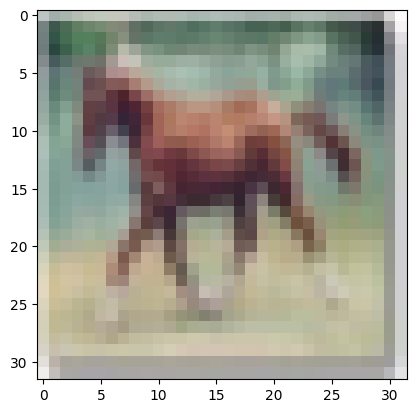

In [9]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
plt.imshow(x_train[23456])
label = y_train[23456]
print(classes[label[0]])